In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## How you saved PFAM and CAZy annotations for published polyporales genomes 20241008

Pfam was a bid dataset for the laptop, saved them in csv to avoid these steps

```
pfam = pd.read_html('https://mycocosm.jgi.doe.gov/mycocosm/annotations/browser/pfam/summary;gPWEkC?p=agaricomycetes')[0]
pfam = pfam[[pfam.columns[0], pfam.columns[-1]] + [x for x in pfam.columns if x in polyporales]]
pfam.to_csv("../data/mycocosm/PFAM.polyporales_published_mycocosm_20241008.csv.gz", index = False, compression='gzip')

cazymes = pd.read_html('https://mycocosm.jgi.doe.gov/mycocosm/annotations/browser/cazy/summary;VEqLv4?p=agaricomycetes')[0]
cazymes = cazymes[[cazymes.columns[0], cazymes.columns[-1]] + [x for x in cazymes.columns if x in polyporales]]
cazymes.to_csv("../data/mycocosm/CAZy.polyporales_published_mycocosm_20241008.csv.gz", index = False, compression='gzip')
```

# Functions

In [113]:
def summarize_pfam_term(pfam_acc:str, term:str):
    temp_list = pfam.loc[pfam['Annotations/Genomes'] == pfam_acc].iloc[:, 2:].select_dtypes(include=[np.number]).stack().dropna().tolist()
    mean_value = np.mean(temp_list)
    median_value = np.median(temp_list)

    temp_df = df.loc[(~df['Sig_acc'].isnull()) & (df['Sig_acc'].str.contains(pfam_acc))]
    temp_df = temp_df.drop_duplicates("GeneID")
    

    abie_count = len(temp_df)
    print(f"Count of {term} in Abie is {abie_count}.\nMean and median of {term} in polyporales are {mean_value:.1f} and {median_value}.")

    plt.figure(figsize=(10, 5))

    # Histogram
    plt.hist(temp_list, bins=10, alpha=0.6, label='Histogram', density=True)
    # Density Plot
    density = pd.Series(temp_list).plot(kind='density', color='red', label='Density')
    # Highlight abie_count with a dashed line
    plt.axvline(x=abie_count, color='red', linestyle='--', label=f'Abie Count ({abie_count})')
    
    plt.title("Histogram and Density Plot of " + term + " count in published polyporales genomes.")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.xlim(0)
    plt.legend()
    plt.show()




def summarize_cazy_term(cazy_term:str, cazy_column:str):
    temp_list = cazy.loc[cazy['Annotations/Genomes'] == cazy_term].iloc[:, 2:].select_dtypes(include=[np.number]).stack().dropna().tolist()
    mean_value = np.mean(temp_list)
    median_value = np.median(temp_list)

    temp_df = cazy_df.loc[cazy_df[cazy_column] == cazy_term]
    temp_df = temp_df.drop_duplicates("GeneID")

    abie_count = len(temp_df)
    
    print(f"Count of {cazy_term} in Abie is {abie_count}.\nMean and median of {cazy_term} in polyporales are {mean_value:.1f} and {median_value}.")

    plt.figure(figsize=(10, 5))

    # Histogram
    plt.hist(temp_list, bins=10, alpha=0.6, label='Histogram', density=True)
    # Density Plot
    density = pd.Series(temp_list).plot(kind='density', color='red', label='Density')
    # Highlight abie_count with a dashed line
    plt.axvline(x=abie_count, color='red', linestyle='--', label=f'Abie Count ({abie_count})')
    
    plt.title("Histogram and Density Plot of " + cazy_term + " count in published polyporales genomes.")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.xlim(0)
    plt.legend()
    plt.show()

# Load data

In [114]:
polyporales = pd.read_csv("../data/mycocosm/polyporales_published_mycocosm_20241008.csv")
polyporales = polyporales['portal'].tolist()
print(len(polyporales), "published polyporales genomes used for this analysis.")

pfam = pd.read_csv("../data/mycocosm/PFAM.polyporales_published_mycocosm_20241008.csv.gz")
cazy = pd.read_csv("../data/mycocosm/CAZy.polyporales_published_mycocosm_20241008.csv.gz")

df = pd.read_csv("../results/all_protein_results.csv.gz")
df["GeneID"] = df['proteinId'].str.split("-R").str[0]

cazy_df = pd.read_csv("../genome/annotation/functional/CAZy/CAZymes_multipleRowsPerProtein.csv.gz")
cazy_df['GeneID'] = cazy_df['proteinId'].str.split("-R").str[0]

64 published polyporales genomes used for this analysis.


# EDA CAZy

Count of EXPN in Abie is 19.
Mean and median of EXPN in polyporales are 19.0 and 19.0.


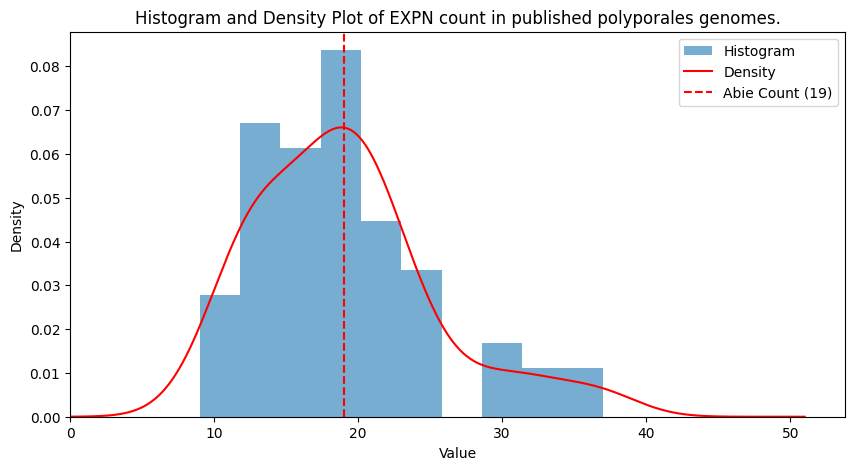

In [115]:
summarize_cazy_term("EXPN", "cazy_family")

Count of AA1 in Abie is 10.
Mean and median of AA1 in polyporales are 8.9 and 8.5.


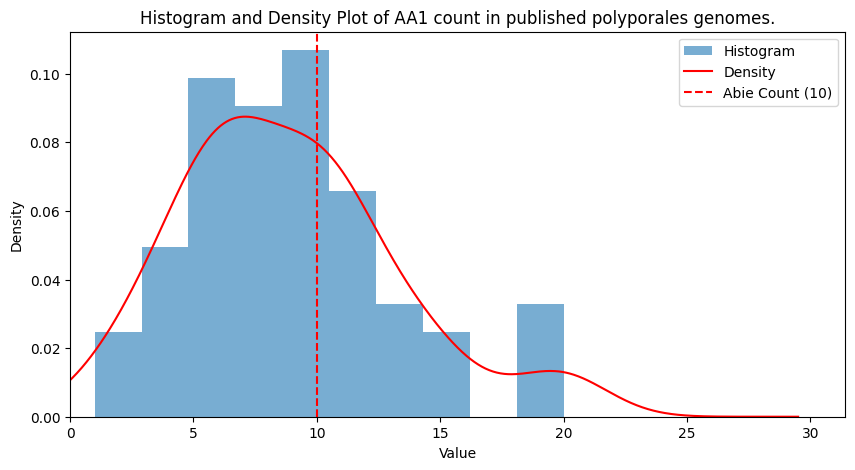

In [116]:
summarize_cazy_term("AA1", "cazy_family")

# EDA PFAM

Count of hydrophobins in Abie is 8.
Mean and median of hydrophobins in polyporales are 16.6 and 20.0.


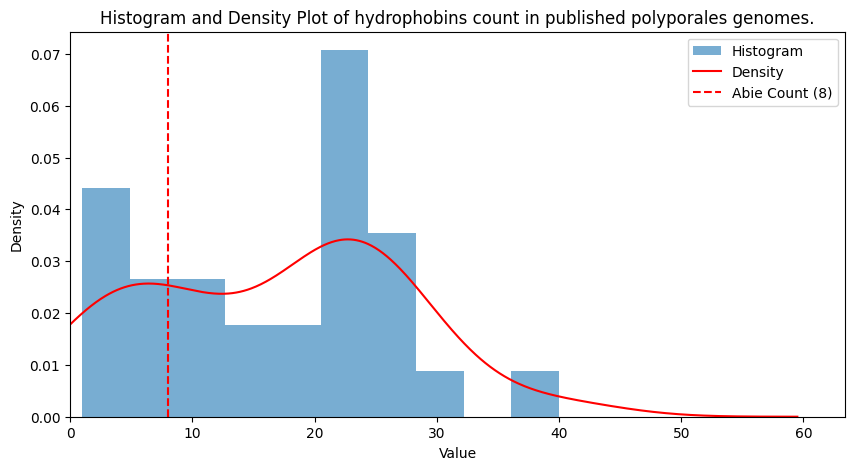

In [80]:
summarize_pfam_term("PF01185", 'hydrophobins')

Count of chloroperoxidase in Abie is 3.
Mean and median of chloroperoxidase in polyporales are 4.0 and 4.0.


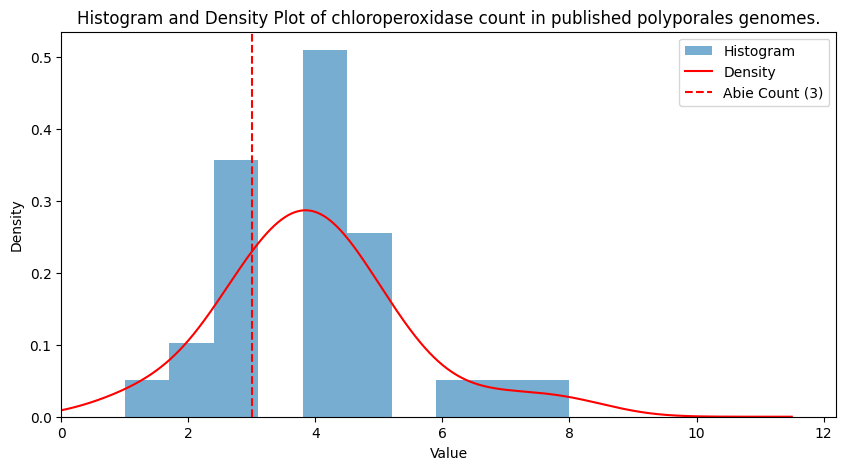

In [81]:
summarize_pfam_term("PF01328", 'chloroperoxidase')